In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import cm
from matplotlib import colors,rc
from scipy import integrate
from IPython.display import HTML
import random

In [93]:
def scenarios(C,i1,j1,i2,j2,p):
    '''Performs reproduction, selection, or exchange steps
    param:: C: Matrix containing population information
    param:: [i1,j1]: coordinates of the current cell in C
    param:: [i2,j2]: coordinates of the neighbor cell in C
    param:: p: selection probability
    return:: C
    '''
    if C[i1,j1]==0 or C[i2,j2]==0:
        C[i1,j1] = max(C[i2,j2],C[i1,j1])
        C[i2,j2] = max(C[i2,j2],C[i1,j1])
    elif C[i1,j1]!=C[i2,j2]:
        if np.random.uniform(0,1)>p: # swap
            dummy1 = C[i1, j1]
            dummy2 = C[i2, j2]
            C[i2, j2] = dummy1
            C[i1, j1] = dummy2
        else:   #fight
            if C[i1,j1]-C[i2,j2]==1 or C[i1,j1]-C[i2,j2]==-2:
                C[i2, j2] = 0
            else:
                C[i1, j1] = 0  
    return C

def add_boundary(A):
    '''Appends the population matrix to introduce periodic boundary
    param:: A: Matrix containing population information
    return:: B
    '''
    B = np.insert(A, 0, A[-1], axis=0)
    B = np.r_[B, [A[0]]]
    B = np.insert(B, 0, B[:, -1], axis=1)
    B = np.c_[B, B[:, 1]]
    return B

def delete_boundary(B):
    '''Truncates the population matrix with periodic boundary to recover original matrix
    param:: B: Matrix containing population information
    return:: A
    '''
    A = B[1:-1,1:-1]
    return A

def select_neighbor():
    '''Selects a neighbor of the current cell
    param:: None
    return:: nc_pos_step 
    '''
    vector=[np.array([-1,0]),np.array([0,1]),np.array([0,-1]),np.array([1,0])]
    nc_pos_step=vector[np.random.randint(4,size=1)[0]]
    return nc_pos_step

def evolution(A,N,time_steps,p,record_pop):
    '''Performs time_steps iterations of the rock-paper-scissors simulation.
    param:: A: Matrix containing population information
    param:: N: Number of individuals in the population
    param:: time_steps: number of iterations
    param:: p: probability of individuals fighting (1-p is probability of mobility)
    param:: record_pop: True/False recording of population
    return:: A,pop
    '''
    if record_pop==True:
        pop=np.zeros([4,time_steps])
    else:
        pop=[]
    B = add_boundary(A)
    for i in np.arange(time_steps):
        c_pos = np.random.randint(1,N+1,size=(2)) #current position
        nc_pos_step=select_neighbor()
        nc_pos = c_pos+nc_pos_step #neighborhood position
        B = scenarios(B,c_pos[0],c_pos[1],nc_pos[0],nc_pos[1],p)
        A = delete_boundary(B)
        if record_pop==True:
            pop[:,i]=[np.shape(np.where(A==0))[1],np.shape(np.where(A==1))[1],np.shape(np.where(A==2))[1],np.shape(np.where(A==3))[1]]
    return A, pop

def evolution_left_favor(A,N,time_steps,p,record_pop):
    '''Performs time_steps iterations of the rock-paper-scissors simulation.
    param:: A: Matrix containing population information
    param:: N: Number of individuals in the population
    param:: time_steps: number of iterations
    param:: p: probability of individuals fighting (1-p is probability of mobility)
    param:: record_pop: True/False recording of population
    return:: A,pop
    '''
    if record_pop==True:
        pop=np.zeros([4,time_steps])
    else:
        pop=[]
    B = add_boundary(A)
    for i in np.arange(time_steps):
        quad=random.choices([0,1,2,3], weights=[1./2,1./6,1./6,1./6,])[0]
        if quad==0: #upper left
            c_pos = np.random.randint(1,int(N/2)+1,size=(2)) 
        elif quad==1: #upper right
            c_pos=np.array([np.random.randint(1,int(N/2)+1,size=1)[0],np.random.randint(int(N/2)+1,N+1,size=1)[0]])
        elif quad==2: #lower left
            c_pos=np.array([np.random.randint(int(N/2)+1,N+1,size=1)[0],np.random.randint(1,int(N/2)+1,size=1)[0]])
        else:
            c_pos = np.random.randint(int(N/2)+1,N+1,size=(2))      
        nc_pos_step=select_neighbor()
        nc_pos = c_pos+nc_pos_step #neighborhood position
        B = scenarios(B,c_pos[0],c_pos[1],nc_pos[0],nc_pos[1],p)
        A = delete_boundary(B)
        if record_pop==True:
            pop[:,i]=[np.shape(np.where(A==0))[1],np.shape(np.where(A==1))[1],np.shape(np.where(A==2))[1],np.shape(np.where(A==3))[1]]
    return A, pop


def evolution_animate(A,N,time_steps,p,time_animation_step):
    '''Performs time_steps iterations of the rock-paper-scissors simulation for animation.
    param:: A: Matrix containing population information
    param:: N: Number of individuals in the population
    param:: time_steps: number of iterations
    param:: p: probability of individuals fighting (1-p is probability of mobility)
    param:: time_animation_step: interval between animation frames
    return:: M
    '''
    B = add_boundary(A)
    M =np.zeros([round(time_steps/time_animation_step),N,N])
    count=0
    for i in np.arange(time_steps):
        c_pos = np.random.randint(1,N+1,size=(2)) #current position
        nc_pos_step=select_neighbor()
        nc_pos = c_pos+nc_pos_step #neighborhood position
        B = scenarios(B,c_pos[0],c_pos[1],nc_pos[0],nc_pos[1],p)
        A = delete_boundary(B)
        B = add_boundary(A)
        if i%time_animation_step==0:
            M[count,:,:]=A
            count+=1
    return M

In [ ]:
'''Sample animation of evolution on a small-sized lattice'''
plt.rcParams['animation.embed_limit'] = 2**128
N=50
p_empty = 0.1
p_rock = (1-p_empty)/3
p_paper = (1-p_empty)/3
p_scissors = (1-p_empty)/3
p=0.4
A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)

time_steps = 200000
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
cmap = colors.ListedColormap(['k','r','b','y'])
im=plt.imshow(A,cmap=cmap)
plt.title("Step 0", fontsize=20)

time_animation_step=200 #choose a divisor of time_steps
M =evolution_animate(A,N,time_steps,p,time_animation_step)

def update(i):
    im.set_array(M[i])
    plt.title("Step %g" %(np.int(time_animation_step *(i+1))), fontsize=20)
    return [im]
ani = animation.FuncAnimation(fig, update, frames=np.int(time_steps/time_animation_step),interval=1, blit=True)
html=HTML(ani.to_jshtml())
display(html)
plt.close()

[]

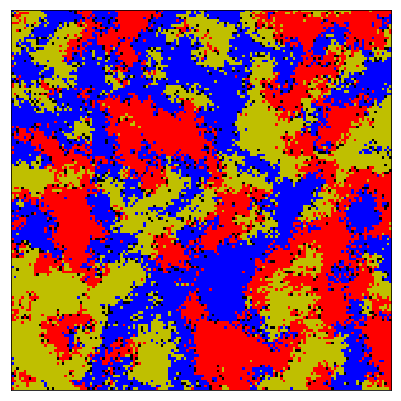

In [10]:
'''Sample of long simulation involving a large-sized lattice.'''
N=150
p_empty = 0.1
p_rock = (1-p_empty)/3
p_paper = (1-p_empty)/3
p_scissors = (1-p_empty)/3
p=0.45

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
time_steps = 6000000
f, axes = plt.subplots(figsize=(7,7))
cmap = colors.ListedColormap(['k','r','b','y'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
M,_ =evolution(A,N,time_steps,p,record_pop=False)
axes.imshow(M,interpolation='nearest', origin='lower',cmap=cmap, norm=norm)
axes.set_xticks([])   
axes.set_yticks([])

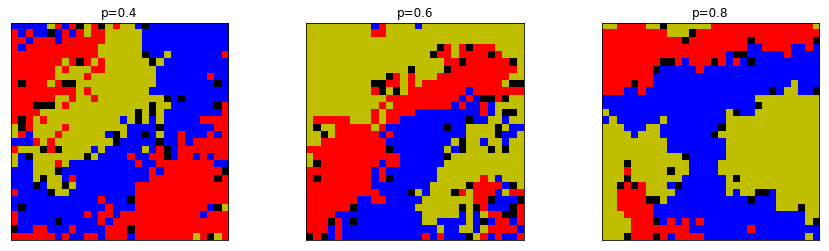

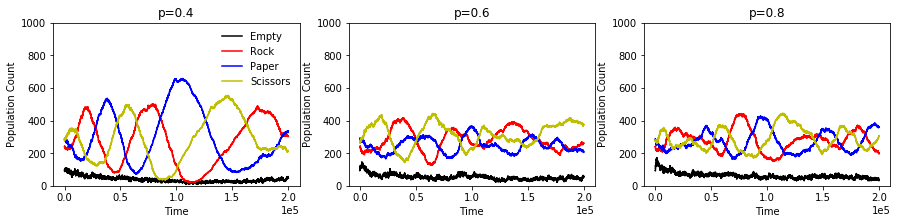

In [100]:
'''Sample of long simulation involving a small-sized lattice with different values of p.'''
N=30
p_empty = 0.1
p_rock = (1-p_empty)/3
p_paper = (1-p_empty)/3
p_scissors = (1-p_empty)/3
p=np.array([0.4,0.6,0.8])

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
time_steps = 200000
f, axes = plt.subplots(1,3,figsize=(15,4))
pop_empty=np.zeros([time_steps,len(p)])
pop_rock=np.zeros([time_steps,len(p)])
pop_paper=np.zeros([time_steps,len(p)])
pop_scissors=np.zeros([time_steps,len(p)])

cmap = colors.ListedColormap(['k','r','b','y'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
for j in range(len(p)):
    M,pop =evolution(A,N,time_steps,p[j],record_pop=True)
    axes[j].imshow(M,interpolation='nearest', origin='lower',cmap=cmap, norm=norm)
    axes[j].set_title('p=%1.1f' %p[j])
    axes[j].set_xticks([])   
    axes[j].set_yticks([])
    pop_empty[:,j]=pop[0,:]
    pop_rock[:,j]=pop[1,:]
    pop_paper[:,j]=pop[2,:]
    pop_scissors[:,j]=pop[3,:] 
    
f, axes = plt.subplots(1,3,figsize=(15,3))
for i in range(len(p)):
    axes[i].set_title('p=%1.1f' %p[i])
    axes[i].plot(pop_empty[:,i],label='Empty',color='k')
    axes[i].plot(pop_rock[:,i],label='Rock',color='r')
    axes[i].plot(pop_paper[:,i],label='Paper',color='b')
    axes[i].plot(pop_scissors[:,i],label='Scissors',color='y')
    axes[i].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    axes[i].set_ylim([0,1000])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Population Count')
axes[0].legend(frameon=False)

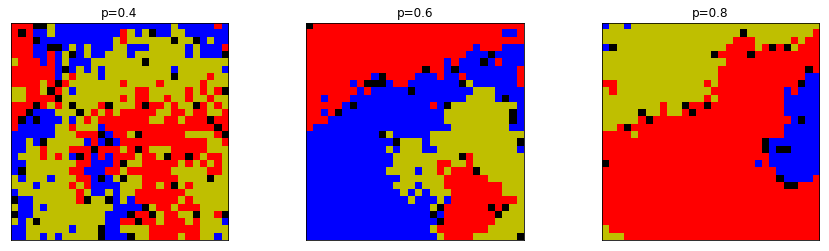

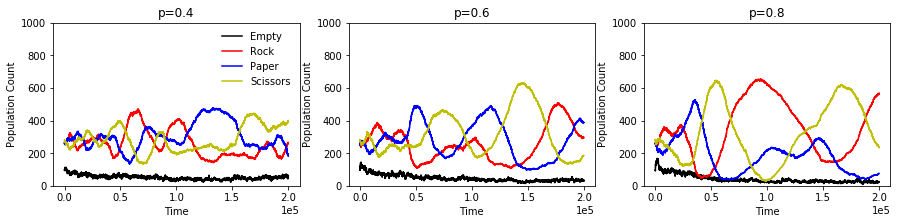

In [101]:
'''Sample of long simulation involving a small-sized lattice where reactions are more likely
to occur at the upper left quadrant, with different values of p'''
N=30
p_empty = 0.1
p_rock = (1-p_empty)/3
p_paper = (1-p_empty)/3
p_scissors = (1-p_empty)/3
p=np.array([0.4,0.6,0.8])

A = np.array(random.choices([0,1,2,3], weights=[p_empty,p_rock,p_paper,p_scissors], k=N**2)).reshape(N,N)
time_steps = 200000
f, axes = plt.subplots(1,3,figsize=(15,4))
pop_empty=np.zeros([time_steps,len(p)])
pop_rock=np.zeros([time_steps,len(p)])
pop_paper=np.zeros([time_steps,len(p)])
pop_scissors=np.zeros([time_steps,len(p)])

cmap = colors.ListedColormap(['k','r','b','y'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
for j in range(len(p)):
    M,pop =evolution_left_favor(A,N,time_steps,p[j],record_pop=True)
    axes[j].imshow(M,interpolation='nearest', origin='lower',cmap=cmap, norm=norm)
    axes[j].set_title('p=%1.1f' %p[j])
    axes[j].set_xticks([])   
    axes[j].set_yticks([])
    pop_empty[:,j]=pop[0,:]
    pop_rock[:,j]=pop[1,:]
    pop_paper[:,j]=pop[2,:]
    pop_scissors[:,j]=pop[3,:] 
    
f, axes = plt.subplots(1,3,figsize=(15,3))
for i in range(len(p)):
    axes[i].set_title('p=%1.1f' %p[i])
    axes[i].plot(pop_empty[:,i],label='Empty',color='k')
    axes[i].plot(pop_rock[:,i],label='Rock',color='r')
    axes[i].plot(pop_paper[:,i],label='Paper',color='b')
    axes[i].plot(pop_scissors[:,i],label='Scissors',color='y')
    axes[i].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    axes[i].set_ylim([0,1000])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Population Count')
axes[0].legend(frameon=False)